Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#IMporting Libraries


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Model

Data Preprocessing

#Training Image Preprocessing

In [ ]:
training_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/train',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


#Validation Image Preprocessing

In [ ]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building A Model

In [ ]:
cnn=tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Input(shape = (64 , 64 , 3)))

#Building Convulutional Layer


In [ ]:
# cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3) , padding = 'valid' , strides = (2,2),activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
# cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
# cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [ ]:
# cnn.add(tf.keras.layers.Flatten())

In [ ]:
# cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
# #output layer
# cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

In [ ]:
inputs = layers.Input(shape = (64 , 64 , 3))

x = layers.Conv2D(filters = 64 , kernel_size = (3,3)  , activation = 'relu')(inputs)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(filters = 64 , kernel_size = (3,3) , activation = 'relu')(x)
x = layers.MaxPooling2D()(x)
# x = layers.Dropout(0.5)(x)
x = layers.Flatten()(x)
x = layers.Dense(128 , activation = 'relu')(x)
outputs = layers.Dense(36 , activation = 'softmax')(x)


model = Model(inputs = inputs , outputs = outputs)

#Compiling and Training Phase

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0   

In [ ]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=30)

Epoch 1/30
98/98 [==============================] - 639s 6s/step - loss: 18.9229 - accuracy: 0.0321 - val_loss: 3.5440 - val_accuracy: 0.0684
Epoch 2/30
98/98 [==============================] - 75s 721ms/step - loss: 3.5089 - accuracy: 0.0604 - val_loss: 3.4653 - val_accuracy: 0.1197
Epoch 3/30
98/98 [==============================] - 76s 716ms/step - loss: 3.4465 - accuracy: 0.0857 - val_loss: 3.4663 - val_accuracy: 0.1225
Epoch 4/30
98/98 [==============================] - 78s 725ms/step - loss: 3.3688 - accuracy: 0.1165 - val_loss: 3.1867 - val_accuracy: 0.1880
Epoch 5/30
98/98 [==============================] - 76s 730ms/step - loss: 3.0994 - accuracy: 0.1971 - val_loss: 3.0085 - val_accuracy: 0.2536
Epoch 6/30
98/98 [==============================] - 76s 729ms/step - loss: 2.7200 - accuracy: 0.2982 - val_loss: 2.4142 - val_accuracy: 0.4330
Epoch 7/30
98/98 [==============================] - 85s 816ms/step - loss: 2.3546 - accuracy: 0.3894 - val_loss: 2.0662 - val_accuracy: 0.5242


#Saving Mode;l

In [ ]:
# model.save('trained_model.h5')

In [ ]:
training_history.history

{'loss': [6.689720630645752,
  4.398435115814209,
  3.6610770225524902,
  3.665220022201538,
  3.1569008827209473,
  2.908301830291748,
  2.74015474319458,
  3.2603914737701416,
  2.4025838375091553,
  2.2806994915008545,
  2.0098907947540283,
  1.655951976776123,
  1.5167149305343628,
  1.3776293992996216,
  1.4376916885375977,
  1.1791131496429443,
  1.4812026023864746,
  1.1264876127243042,
  1.0432990789413452,
  1.0428425073623657,
  1.0412108898162842,
  1.0189512968063354,
  1.0240057706832886,
  0.8539509177207947,
  0.7861953377723694,
  0.7649301290512085,
  0.8236211538314819,
  0.7450425028800964,
  0.7703741192817688,
  0.7556395530700684],
 'accuracy': [0.04398074001073837,
  0.06420546025037766,
  0.11332263052463531,
  0.1556982398033142,
  0.23274478316307068,
  0.29695025086402893,
  0.35345104336738586,
  0.42664527893066406,
  0.46902087330818176,
  0.5146067142486572,
  0.5656501054763794,
  0.6282504200935364,
  0.6587479710578918,
  0.6895666122436523,
  0.709470

#Recording History

In [ ]:
import json
with open('training_history.json','w') as f:
  json.dump(training_history.history,f)


In [ ]:
print(training_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#Calculating accuracy of model achieved on Validation Set

In [ ]:
print("Validation Set Acuuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation Set Acuuracy: 73.21937084197998 %


#Accuracy Visualization

In [ ]:
#Training Visualization

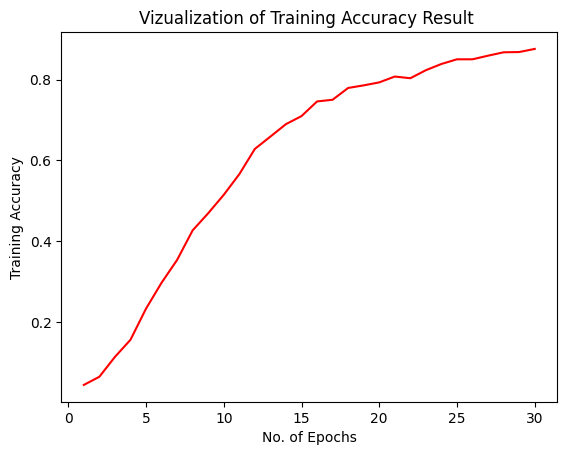

In [ ]:
epochs=[i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel("No. of Epochs")
plt.ylabel("Training Accuracy")
plt.title("Vizualization of Training Accuracy Result ")
plt.show()

#Validation Accuracy

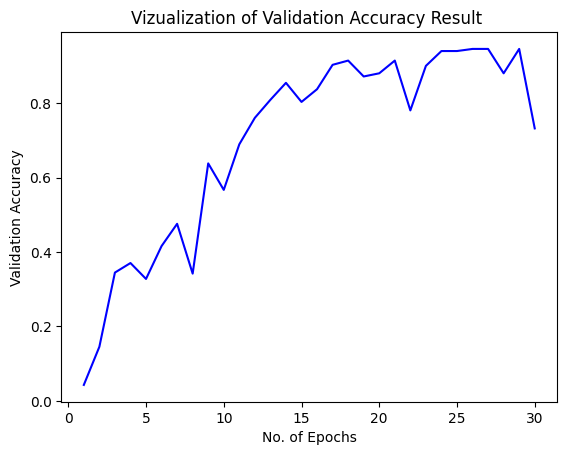

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Vizualization of Validation Accuracy Result ")
plt.show()

In [ ]:
training_loss,training_accuracy=cnn.evaluate(training_set)

98/98 [==============================] - 87s 813ms/step - loss: 2.0226 - accuracy: 0.7445


In [ ]:
val_loss,val_accuracy=cnn.evaluate(validation_set)

11/11 [==============================] - 12s 258ms/step - loss: 3.4476 - accuracy: 0.7322


#Test Set Evaluation

In [ ]:
test_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/test',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [ ]:
test_loss,test_accuracy=cnn.evaluate(test_set)

12/12 [==============================] - 66s 1s/step - loss: 3.3982 - accuracy: 0.7354
